In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create a simple fully connected neural network model
def autoencoder():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dense(28*28))
    return model

def classifier():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(32,)))
    model.add(layers.Dense(10))
    return model


def train_autoencoder():
    autoencoder_model = autoencoder()
    autoencoder_model.compile(optimizer='adam', loss='mse')  # Use appropriate loss function

    # Load your training data (X_train) here
    autoencoder_model.fit(train_images, train_images, epochs=10, batch_size=128)  # Adjust epochs and batch_size

    # Save the weights of the first layer
    autoencoder_first_layer_weights = autoencoder_model.layers[0].get_weights()

    return autoencoder_first_layer_weights

def create_combined_model(autoencoder_first_layer_weights):
    # Define the classifier model without the first layer
    classifier_model = classifier()
    # classifier_model.pop()  # Remove the first layer

    # Load the weights of the first layer from the pre-trained autoencoder
    classifier_model.layers[0].set_weights(autoencoder_first_layer_weights)

    return classifier_model

def train_combined_model(combined_model):
    # Compile the combined model with an appropriate optimizer and loss function
    combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

    # Load your labeled data (X_train_labeled, y_train_labeled) here
    combined_model.fit(train_images, train_labels, epochs=10, batch_size=128)  # Adjust epochs and batch_size


autoencoder_first_layer_weights = train_autoencoder()
combined_model = create_combined_model(autoencoder_first_layer_weights)
train_combined_model(combined_model)

# Compile the model
# model.compile(optimizer='adam',
#               loss='mse',
#               metrics=['accuracy'])

# # Train the model
# model.fit(train_images, train_images, epochs=10, batch_size=64, validation_data=(test_images, test_images))

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(test_images, test_images)
# print(f'Test accuracy: {test_acc}')

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0383
Epoch 2/10
469/469 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 3/10
469/469 [==============================] - 0s 987us/step - loss: 0.0216
Epoch 4/10
469/469 [==============================] - 0s 968us/step - loss: 0.0204
Epoch 5/10
469/469 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 6/10
469/469 [==============================] - 0s 997us/step - loss: 0.0190
Epoch 7/10
469/469 [==============================] - 0s 986us/step - loss: 0.0187
Epoch 8/10
469/469 [==============================] - 0s 972us/step - loss: 0.0184
Epoch 9/10
469/469 [==============================] - 0s 970us/step - loss: 0.0183
Epoch 10/10
469/469 [==============================] - 0s 966us/step - loss: 0.0183


ValueError: Layer dense_21 weight shape (32, 32) is not compatible with provided weight shape (784, 32).

313/313 [==============================] - 0s 503us/step


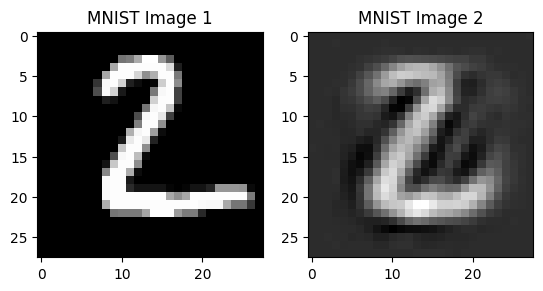

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have an MNIST image with shape (784,)
recovered_image = model.predict(test_images)[1]
original_image = test_images[1]
# Reshape the image to 28x28
recovered_image = recovered_image.reshape(28, 28)
original_image = original_image.reshape(28, 28)
# Display the image using Matplotlib
# Display the images side by side using Matplotlib
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('MNIST Image 1')

plt.subplot(1, 2, 2)
plt.imshow(recovered_image, cmap='gray')
plt.title('MNIST Image 2')

plt.show()